# Article Title:
## Explainable Machine Learning Prediction For Traffic Congestion During COVID-19 Using Human Mobility and Street-Waste Features

The Figures are for the article under submission titled Explainable Machine Learning Prediction For Traffic Congestion During COVID-19 Using Human Mobility and Street-Waste Features. Please refer the article for more details. 

In [100]:
# Author: Negin Zarbakhsh

In [29]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import datetime
import holidays
import geopandas as gpd
import scipy.stats as sp
from scipy.stats import norm, skew
from scipy import stats
from termcolor import colored

In [8]:
PATH = 'C:/Users/Negee/Article 2 -  Feburay 2022/Github/Figures + Codes/Data/'

In [113]:
# Plots Styles
plt.rcdefaults() 
sns.set_style("whitegrid")
sns.set_style('ticks')

## COVID-19 Data Analysis (Ireland)

In [30]:
# Number of Confirmed Cases
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', parse_dates= True)
# Number of Death
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv' , parse_dates= True)

# Filtering Data for Republic of Ireland
confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Ireland']
#Storing Columns names
cols = confirmed_df.keys()
#Filtering the date of columns for both number of death & Cases for Ireland
confirmed = confirmed_df.loc[:, cols[42]:cols[-1]]
deaths = deaths_df.loc[:, cols[42]:cols[-1]]
# Specifying the dates
dates = confirmed.keys()
#####################################################################################################

In [119]:
# Storing the number of cases, death and mortality rate in list 
Ireland_cases = []
Ireland_death = [] 
Ireland_mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    # confirmed, deaths, recovered, and active
    Ireland_cases.append(confirmed_sum)
    Ireland_death.append(death_sum)
    
    # calculate rates
    Ireland_mortality_rate.append(death_sum/confirmed_sum)
    average_mortality = np.mean(Ireland_mortality_rate) 
    
##################################################################################################
print(colored('\n Overview of COVID Situation in Ireland:\n' ,'green', attrs=['bold']))   
# Situation in Ireland
print ('From {} to {} :\n Ireland has witnessed the Total number:\n Confirmed Cases : {} ,\n Death : {} & \n Average Mortality Rate : {} '
       .format (cols[4:][0],
                 cols[4:][-1],
                confirmed_sum,
                death_sum,average_mortality))


 Overview of COVID Situation in Ireland:

From 1/22/20 to 2/23/22 :
 Ireland has witnessed the Total number:
 Confirmed Cases : 1284179 ,
 Death : 5917606 & 
 Average Mortality Rate : 33.17231511539593 


## Fig3 A: Cumulative along with the daily number and 7 days moving average  of COVID-19 cased in Ireland.

In [120]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size for average
window = 7

# confirmed cases
Irelanddaily_increase = daily_increase(Ireland_cases)
Irelandconfirmed_avg = moving_average(Ireland_cases, window)
Irelanddaily_increase_avg = moving_average(Irelanddaily_increase, window)

# deaths
Irelanddaily_death = daily_increase(Ireland_death)
Irelanddeath_avg = moving_average(Ireland_death, window)
Irelanddaily_death_avg = moving_average(Irelanddaily_death, window)

# Creat an array of Ireland cases and death for 
Ireland_cases = np.array(Ireland_cases)
Ireland_death = np.array(Ireland_death)

##### # Converting the list of dates to number starting from 29 Frburary to the last date of covid for plotting

In [122]:
# Changing date to numbers and flatteb them for visualization
number_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1).flatten()

In [123]:
def Ireland_plot(x, y1, y2):

    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
       
    fig, ax = plt.subplots(figsize=(7, 5))
    
    ax.plot(x, y1, color ="#c994c7",linestyle='--',linewidth=2.5)
    ax.legend(['Ireland Confirmed Cases'], prop={'size': 10}, loc= 'upper right')
    plt.xticks(rotation=0)
    
    #Set x_axis Label
    ax.set_xlabel ("Days since 29 Feburary 2020", fontsize =14)
    ax.set_ylabel('# of cases in Ireland', size=14)

    # Twin axes for showing the number of confirmed cases in Ireland
    ax2=ax.twinx()
    ax2.bar(x, y2, color ='#7fcdbb', edgecolor="#7fcdbb")
    ax2.plot(x, confirmed_increase_avg, color='#fec44f', linestyle='dashed', linewidth=2, label = 'Daily Increase in Confirmed Cases')
    ax2.legend(['Moving Average {} Days'.format(window), 'Ireland Daily Increase in Confirmed Cases'], prop={'size': 10}, loc= 'upper left')    
    plt.show()
    
# save the plot as a file
    fig.savefig('Ireland_COVID.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')    

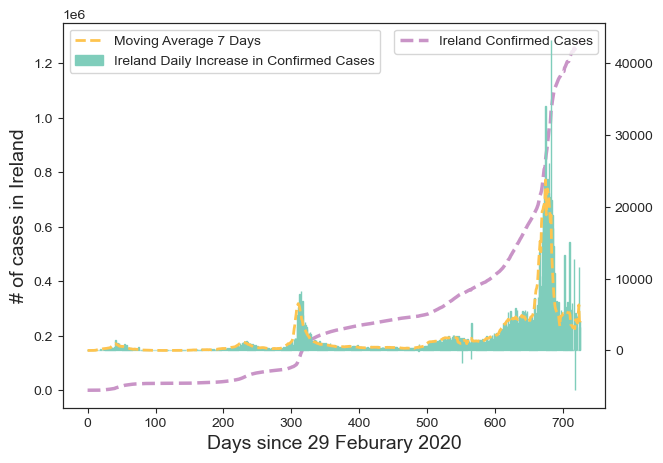

In [124]:
Ireland_plot (number_dates , Ireland_cases, Irelanddaily_increase)

# Fig3 B: Cumulative number of confirmed cases in all Ireland counties from the start of the pandemic till 22 December 2020.
##### https://data.gov.ie/

In [125]:
#Reading GeoPanda Shapefile
Ireland_shape_file = gpd.read_file(PATH + 'IRL_ADM1.shp/IRL_ADM1.shp')
# Changing Index
Ireland_shape_file = Ireland_shape_file.set_index ('NAME')
#Map values using input correspondence for removing Country text for further joining
Ireland_shape_file.index = Ireland_shape_file.index.map(lambda x : str(x)[7:])

In [126]:
#Reading Country Level Data
covid_data = pd.read_csv('https://opendata-geohive.hub.arcgis.com/datasets/d9be85b30d7748b5b7c09450b8aede63_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D')
# Filtering Couumn
covid_data = covid_data[['CountyName', 'ConfirmedCovidCases', 'TimeStamp']]
#Selecting the last date
covid_data = covid_data[covid_data['TimeStamp'] == covid_data['TimeStamp'].max()]
covid_data = covid_data.set_index('CountyName')
covid_data = covid_data.drop('TimeStamp', axis = 1)

In [127]:
# Joining SHAP data to final confirmed cases per counties
county_df= Ireland_shape_file.join (covid_data)
county_df = county_df.reset_index()

In [189]:
county_df.head()

,NAME,ISO_Code,Level,adm,adm_int,feature_id,gbid,iso,geometry,ConfirmedCovidCases
0,Wicklow,IE-WW,ADM1,ADM1,1,0,IRL_ADM1_1_3_3_0,IRL,"POLYGON ((-6.79229 52.99213, -6.79206 52.99250...",31457
1,Dublin,IE-D,ADM1,ADM1,1,1,IRL_ADM1_1_3_3_1,IRL,"MULTIPOLYGON (((-6.54689 53.27948, -6.54642 53...",392389
2,Meath,IE-MH,ADM1,ADM1,1,2,IRL_ADM1_1_3_3_2,IRL,"POLYGON ((-7.34362 53.79906, -7.33166 53.80409...",53584
3,Waterford,IE-WD,ADM1,ADM1,1,3,IRL_ADM1_1_3_3_3,IRL,"POLYGON ((-8.16278 52.14099, -8.16271 52.14135...",30898
4,Monaghan,IE-MN,ADM1,ADM1,1,4,IRL_ADM1_1_3_3_4,IRL,"POLYGON ((-7.33956 54.14672, -7.33923 54.14693...",19322


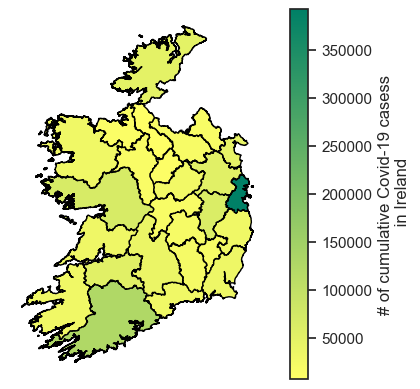

In [200]:
fig, ax = plt.subplots(facecolor='white')
color_map = plt.cm.get_cmap('summer')
reversed_color_map = color_map.reversed()

figure = county_df.plot(figsize = (7, 5), 
                  column='ConfirmedCovidCases',
                   cmap=reversed_color_map,
                   linewidth=1,
                   ax=ax, 
                   edgecolor='#000000',
                   vmin=county_df['ConfirmedCovidCases'].min(),
                   vmax=county_df['ConfirmedCovidCases'].max(),
                   legend=True, legend_kwds={"label": "# of cumulative Covid-19 casess\n in Ireland",
                                 "orientation": "vertical"})

plt.xticks([])
plt.yticks([])
ax.axis('off')

#annotation

# save the plot as a file
ax.figure.savefig('Ireland_COVIDmap.pdf',
        format='pdf',
        dpi=1800,
        bbox_inches='tight')    

# Fig 4: Net weight (Ton) of biodegradable waste collected from gardens and parks from March 2020 to December 2021 in Dublin along with mobility restrictions and changes in parks.

This plot shows the mobility changes in parks in Ireland along with the parks waste data and level of government restrictions

In [144]:
#read the integerated and clean file
parks = pd.read_csv(PATH + "Parks.csv", parse_dates=True)

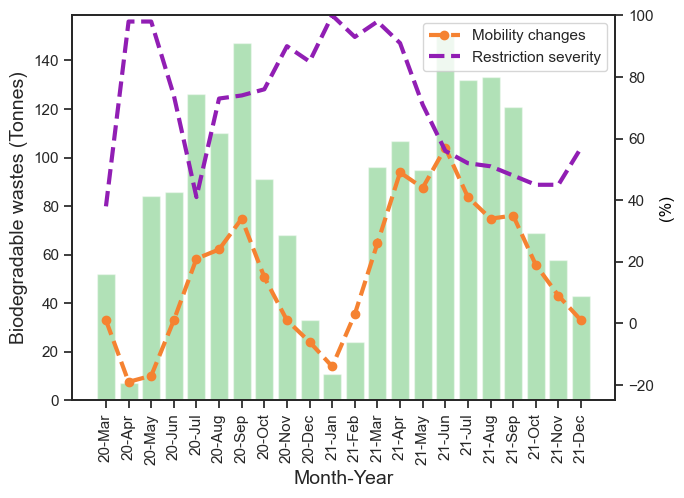

In [145]:
#Set the aesthetic style of the plots.
sns.set()
sns.set_style("whitegrid")
sns.set_style('ticks')
sns.color_palette("Paired")


fig, ax = plt.subplots(figsize=(7, 5))
# Make a Plot
ax.bar(parks.Date, parks.Net_weight, color = "#3cb44b" ,  alpha=0.4, label ='Biodegradable wastes (Tonnes)')
plt.xticks(rotation=90)
#Set x_axis Label
ax.set_xlabel ("Month-Year", fontsize =14)
#set y_axis Label 
ax.set_ylabel("Biodegradable wastes (Tonnes)",fontsize=14)

ax2=ax.twinx()
plt.ylim([-25, 100])

# make a plot with different y-axis using second axis object
ax2.plot(parks.Date, parks.Parks_mobility_changes,
         color ="#f58231",marker="o", linestyle='--',linewidth=3,label = 'Mobility changes ')
ax2.plot(parks.Date, parks.Restriction_severity,
         color ="#911eb4",linestyle='--',linewidth=3, label = 'Restriction severity')

ax2.set_ylabel("Mobility changes in parks (%)",color="red",fontsize=14)
ax2.set_ylabel("(%)",fontsize=12, color = 'black')
plt.legend()

plt.show()

# save the plot as a file
fig.savefig('Biodegradable wate.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

# Fig5: A density plot of traffic congestion in Dublin using a kernel density estimation of the distribution

In [15]:
#Reading file an~d date indeing
df = pd.read_csv(PATH+'Agreegated_Data.csv', parse_dates=['date'], index_col= 'date')
df = df.reset_index()
#Create Time-Related Features
df['Month'] = df.date.dt.month
df['Year'] = df.date.dt.year
df = df.set_index(df.date, drop =True)
df.drop(['date', 'Month'], inplace = True, axis = 1)
df['Holiday'] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday('Ireland').get(x)).values
df['Holiday'] = df['Holiday'].astype('bool').astype('int')
# We slected cotegoric features for one-hot encoding
df= pd.get_dummies(df, columns=['Holiday'])
df = df.drop(['Year'], axis = 1)
#Period
print ('Period of study %', - (df.index.min()- df.index.max()))
df.index.min(), df.index.max()

Period of study % 655 days 00:00:00


(Timestamp('2020-03-07 00:00:00'), Timestamp('2021-12-22 00:00:00'))

- **Mean:** Avergae of our confirmed cases {sum/number of samples}
- **Median:** Sorting all the values and taking the value at the midpoint
- **Mode:** The most common value in a data set
- **Variance :** The average of the squared difference from the mean
- **Standard Deviation:** The Square root of the variance

- **Percentile :** In our DF, what's the point at which X% of the values are less than that value?

- 25% of the value is less than 21
- 50% of the value is less than 29
- 75% of the value is less than 37
- 90% of the value is less than 50

- **Moments:**
Quantitative measures of the shape of probability density function.
- First Moment : Mean
- Second Moment: Variance
- Third Moment: Skew : How lopsided is the distribution ( A distribution with a tail on the left will be skewed left and have a negative skew.
- Kurtosis: How thick is the tail, and how sharp is the peak, compared to a normal distribution?

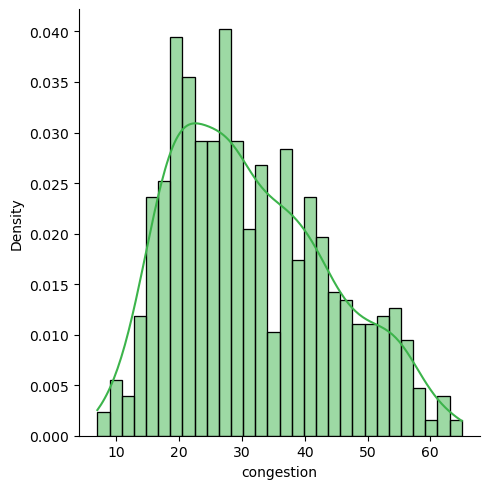

Dublin Traffic Congestion with skew 0.4790267845546683
The mean of Congestion is : 31.553353658536587
The median of Congestion is : 30.0
The mode of Congestion is : ModeResult(mode=array([19], dtype=int64), count=array([30]))
The variance of traffic congestion is : 155.83251924077936
The standard deviation of traffic congestion is : 12.483289600132625
The 25th percentile value of traffic congestion is: 21.0
The 50th percentile value of traffic congestion is: 30.0
The 75th percentile value of traffic congestion is: 38.0
The 90th percentile value of traffic congestion is : 50.0
first moment [Mean] is : 31.553353658536587
second moment [Variance] is : 155.83251924077936
Third moment [Skew] is : 0.47793075245973127
forth moment [Kurtosis] is : -0.5655721913848328


In [21]:
sns.set(rc={'figure.figsize':(7,5)})
sns.reset_defaults()
histoplot = sns.displot(df.congestion, kde=True, color ='#3cb44b', stat='density', bins=30)

plt.show()

print( (f'Dublin Traffic Congestion with skew {df.congestion.skew()}'))
# Mean & Median
print ('The mean of Congestion is :' , np.mean(df['congestion']))
print ('The median of Congestion is :' , np.median(df['congestion']))
print ('The mode of Congestion is :' , stats.mode(df['congestion']))

# Varianance & SD
print ('The variance of traffic congestion is :' , np.var(df['congestion']))
print ('The standard deviation of traffic congestion is :' , np.std(df['congestion']))

#Percentiles and Moments
print ('The 25th percentile value of traffic congestion is:', np.percentile(df['congestion'] , 25))
print ('The 50th percentile value of traffic congestion is:', np.percentile(df['congestion'] , 50))
print ('The 75th percentile value of traffic congestion is:', np.percentile(df['congestion'] , 70))
print ('The 90th percentile value of traffic congestion is :', np.percentile(df['congestion'] , 90))

#first moment
print ('first moment [Mean] is :',np.mean (df['congestion']))
# second moment
print ('second moment [Variance] is :', np.var(df['congestion']))
# Third moment
print ('Third moment [Skew] is :', sp.skew(df['congestion']))
# Forth moment
print ('forth moment [Kurtosis] is :', sp.kurtosis(df['congestion']))

# Further Visualization which are refered in appendix

# 14-day positivity rate of COVID-19 for Ireland country subdivisions

Data Source: European Centre for Disease Prevention and Control Dataset Data

This plot shows the 14-days rate COVID-19 in Ireland and reported in appendix.

Ireland uses Nomenclature of Territorial Units for Statistics (NUTS) geocode standards for referencing country subdivisions \cite{cso}. Based on the second level categorization, Ireland is divided into Northern Western, Southern and Eastern Midland areas. Northern Western includes Border and West categories which contains Donegal, Sligo, Leitrim, Cavan and Monaghan counties. Southern includes Mid West, South East, South West including Clare, Tipperary, Limerick, South East includes Waterford, Kilkenny, Carlow, Wexford, Cork and Kerry counties. Eastern Midland contains Dublin, Mid-East and Midlands which includes the Dublin, Wicklow, Kildare, Meath, Louth, Longford, Westmeath, Offaly and Laois counties.

In [114]:
# Data From European Centre for Disease Prevention and Control
incident = pd.read_csv(PATH + 'Rate_14_covid.csv')
# Filtering Ireland
incident_Ireland = incident[incident['country']== 'Ireland']
#Filtering Date Periods
incident_Ireland = incident_Ireland[(incident_Ireland['year_week']>= '2021-19') & (incident_Ireland['year_week']< '2022-01')]
#Storing Coulumn Names
keys = incident_Ireland.keys()
# Filtering certain 
incident_Ireland2 = incident_Ireland.loc[ : , keys[1]:keys[-2]]
#rish NUTS 2 and NUTS 3 region divisions
region_name = incident_Ireland2.region_name.unique()

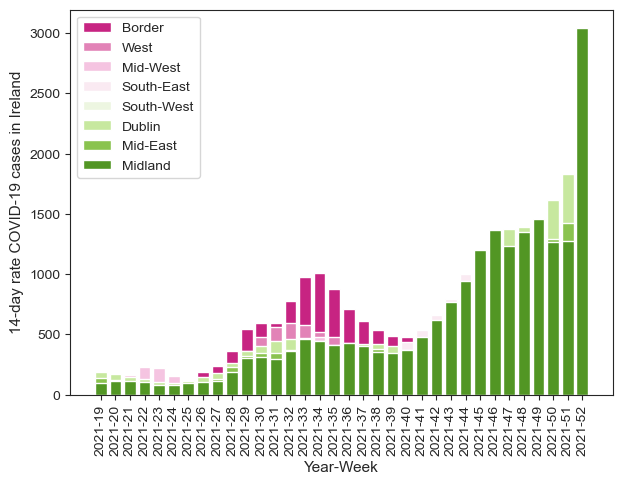

In [116]:
x = incident_Ireland2.year_week.unique()
# Specifying Colors pf Plot
color=sns.color_palette("PiYG", 8)
# Make a Plot
fig, ax = plt.subplots(figsize=(7, 5))
for i in range (0, len(region_name)):
    plt.bar(x, incident_Ireland2[incident_Ireland2.region_name == region_name[i]]['rate_14_day_per_100k'].to_list(),
            color=color[i], label=region_name[i])
    
plt.xticks(rotation=90)
#set x_axis & y_axis Label 
ax.set_ylabel("14-day rate COVID-19 cases in Ireland",fontsize=11)
ax.set_xlabel ("Year-Week", fontsize =11)
plt.legend()

plt.show()
# save the plot as a file
fig.savefig('Irelandcounty.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

### Figure Street Waste & Public Holidays in Ireland

In [146]:
df2 = pd.read_csv('C:/Users/Negee/Article 2 -  Feburay 2022/Final Data/Wasteandholidays.csv', parse_dates=True)
color=sns.color_palette("pastel")

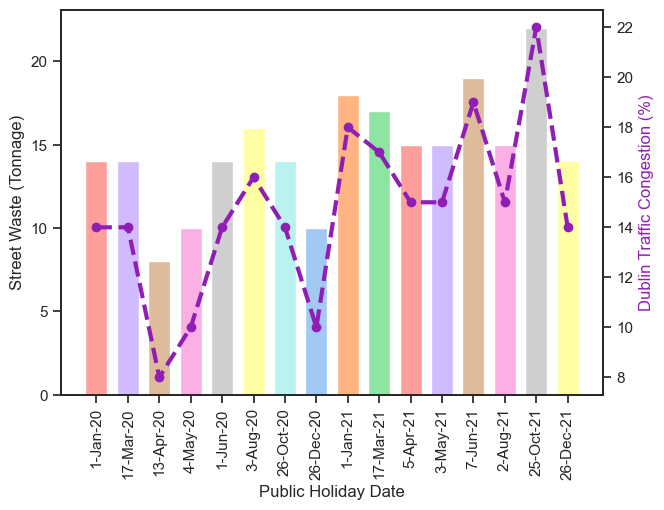

In [147]:
width = 0.7

date = df2['date'].to_list()
labels = df2['Calender'].to_list()
fig, ax = plt.subplots(figsize=(7, 5)) 
label = np.unique(df2['Calender'])

for i in range(16):
    bar = ax.bar(date[i], df2['Congestion'][i], width, color = color[i-7] )
  #  plt.legend(np.unique(df2['Calender'][i]), fontsize =8 )
    
plt.xticks(rotation=90)
plt.xlabel("Public Holiday Date")
plt.ylabel('Street Waste (Tonnage)')
ax2=ax.twinx()
ax2.set_ylabel("Dublin Traffic Congestion (%)",fontsize=12, color = 'black')
plt.xticks(rotation=90)
ax2.yaxis.label.set_color('#911eb4')



# make a plot with different y-axis using second axis object
ax2.plot(df2['date'], df2.Congestion,  color ="#911eb4",marker="o", linestyle='--',linewidth=3)
plt.xticks(rotation=90) 
#plt.legend(bar, label)
plt.show()
# save the plot as a file
fig.savefig('holiday.png',
            format='png',
            dpi=1800,
            bbox_inches='tight')